
## Chollet: Classifying Newswires - Reuters Dataset


In [5]:

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [6]:

train_labels[10]


3

In [7]:

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1

    return results


In [8]:

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)


In [10]:

def to_one_hot(labels, dimension=46):

    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):

        results[i, label] = 1

    return results


In [11]:

one_hot_train_labels = to_one_hot(train_labels)

one_hot_test_labels = to_one_hot(test_labels)



In [12]:

from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [13]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [17]:

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [18]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 0s 14ms/step - loss: 2.6116 - accuracy: 0.5313 - val_loss: 1.7013 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.3938 - accuracy: 0.7102 - val_loss: 1.2841 - val_accuracy: 0.7250
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0338 - accuracy: 0.7849 - val_loss: 1.1176 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8156 - accuracy: 0.8280 - val_loss: 1.0270 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6510 - accuracy: 0.8651 - val_loss: 0.9728 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5249 - accuracy: 0.8915 - val_loss: 0.9895 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.4301 - accuracy: 0.9116 - val_loss: 0.9375 - val_accuracy: 0.8030
Epoch 8/20
16/16 [=

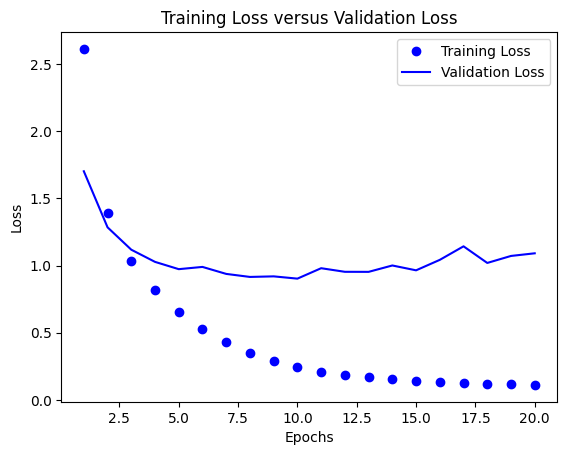

In [20]:

import matplotlib.pyplot as plt

plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss versus Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



## Start a New NN

This model begins to overfit after 9 epochs. in other words, addtional learning after 9 epochs learns patters exclusive to the test data. 


In [22]:

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 0s 16ms/step - loss: 2.6104 - accuracy: 0.5104 - val_loss: 1.7331 - val_accuracy: 0.6310
Epoch 2/9
16/16 [==============================] - 0s 9ms/step - loss: 1.4293 - accuracy: 0.7011 - val_loss: 1.3282 - val_accuracy: 0.6990
Epoch 3/9
16/16 [==============================] - 0s 9ms/step - loss: 1.0660 - accuracy: 0.7732 - val_loss: 1.1609 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 0s 9ms/step - loss: 0.8380 - accuracy: 0.8234 - val_loss: 1.0335 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 9ms/step - loss: 0.6687 - accuracy: 0.8564 - val_loss: 0.9790 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 0s 8ms/step - loss: 0.5289 - accuracy: 0.8874 - val_loss: 0.9221 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 9ms/step - loss: 0.4189 - accuracy: 0.9143 - val_loss: 0.9095 - val_accuracy: 0.8120
Epoch 8/9
16/16 [=========

In [23]:
results

[0.9699562191963196, 0.7911843061447144]

## Generate Predictions on New Data

Since this model is successful at categorizing validation data, it should be able to categorize data it hasn't seen before. 


In [24]:

predictions = model.predict(x_test)


71/71 [==============================] - 0s 518us/step


In [25]:

np.sum(predictions[0])


1.0000002

In [26]:

np.argmax(predictions[0])


3